<a href="https://colab.research.google.com/github/ChrisMath26/Bases_ML/blob/main/Aprendizaje%20no%20supervisado%5CChristian_Trilleras_Aprendizaje_No_Supervisado.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Ejercicio 1

Con el conjunto de pinguinos de las islas de antártica, realice una tarea de clasificación para clasificar la especie del pinguino. Para ello entrene 5 modelos diferentes usando validación cruzada por k-folds. Escoja el mejor algoritmo y realice un ajuste de hiperparámetros del mejor clasificador hallado. Visualice los resultados del clasificador usando PCA con 2 componentes principales.


# Importar librerías

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder

#Importar banco de datos

In [ ]:
datos=pd.read_csv('penguins.csv')
datos

,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex
0,Adelie,Torgersen,39.1,18.7,181.0,3750.0,male
1,Adelie,Torgersen,39.5,17.4,186.0,3800.0,female
2,Adelie,Torgersen,40.3,18.0,195.0,3250.0,female
3,Adelie,Torgersen,NaN,NaN,NaN,NaN,NaN
4,Adelie,Torgersen,36.7,19.3,193.0,3450.0,female
...,...,...,...,...,...,...,...
339,Chinstrap,Dream,55.8,19.8,207.0,4000.0,male
340,Chinstrap,Dream,43.5,18.1,202.0,3400.0,female
341,Chinstrap,Dream,49.6,18.2,193.0,3775.0,male
342,Chinstrap,Dream,50.8,19.0,210.0,4100.0,male


#Preprocesamiento y visualización de los datos


In [ ]:
# Verificar si hay datos faltantes
print(datos.isna().sum())


species               0
island                0
bill_length_mm        2
bill_depth_mm         2
flipper_length_mm     2
body_mass_g           2
sex                  11
dtype: int64


In [ ]:
#Imputar valores numéricos con la media
Colum_Num = ['bill_length_mm', 'bill_depth_mm', 'flipper_length_mm', 'body_mass_g']

for col in Colum_Num:
    mean_value = datos[col].mean()
    datos[col].fillna(mean_value, inplace=True)

# Imputar valores categóricos con la moda
mod_val = datos['sex'].mode()[0]
datos['sex'].fillna(mod_val, inplace=True)
# Verificar que no queden valores NaN
print(datos.isna().sum())

species              0
island               0
bill_length_mm       0
bill_depth_mm        0
flipper_length_mm    0
body_mass_g          0
sex                  0
dtype: int64


In [ ]:
datos

,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex
0,Adelie,Torgersen,39.10000,18.70000,181.000000,3750.000000,male
1,Adelie,Torgersen,39.50000,17.40000,186.000000,3800.000000,female
2,Adelie,Torgersen,40.30000,18.00000,195.000000,3250.000000,female
3,Adelie,Torgersen,43.92193,17.15117,200.915205,4201.754386,male
4,Adelie,Torgersen,36.70000,19.30000,193.000000,3450.000000,female
...,...,...,...,...,...,...,...
339,Chinstrap,Dream,55.80000,19.80000,207.000000,4000.000000,male
340,Chinstrap,Dream,43.50000,18.10000,202.000000,3400.000000,female
341,Chinstrap,Dream,49.60000,18.20000,193.000000,3775.000000,male
342,Chinstrap,Dream,50.80000,19.00000,210.000000,4100.000000,male


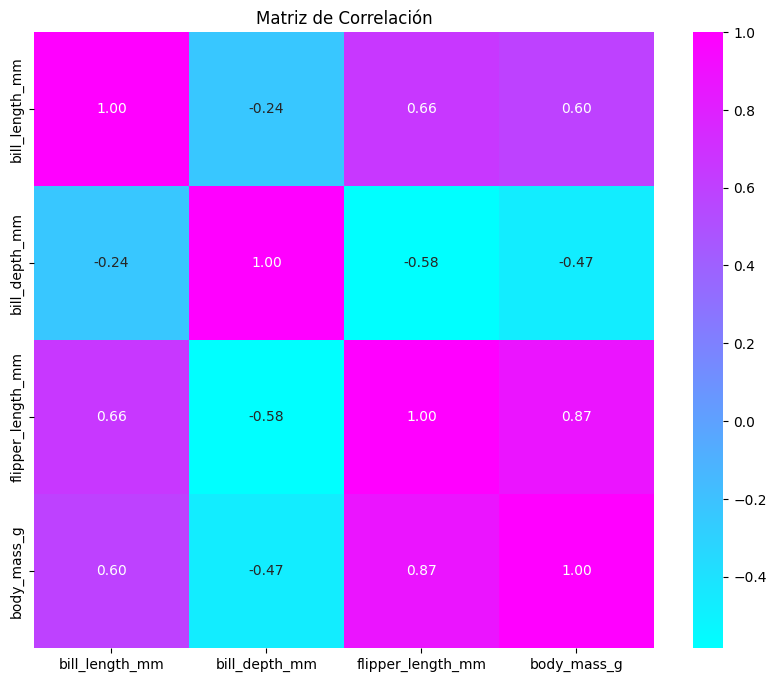

In [ ]:
import seaborn as sns
# Seleccionar solo las columnas numéricas
num_col = ['bill_length_mm', 'bill_depth_mm', 'flipper_length_mm', 'body_mass_g']
# Crear un DataFrame solo con las columnas numéricas
datos_numericos = datos[num_col]
# Calcular la matriz de correlación
matriz_correlacion = datos_numericos.corr()
# Crear una figura
plt.figure(figsize=(10, 8))
# Dibujar el heatmap
sns.heatmap(matriz_correlacion, annot=True, cmap="cool", fmt='.2f')
plt.title("Matriz de Correlación")
# Mostrar el gráfico
plt.show()

<ipython-input-7-e0ddf63b2755>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  datos_numericos["species"]=datos["species"]


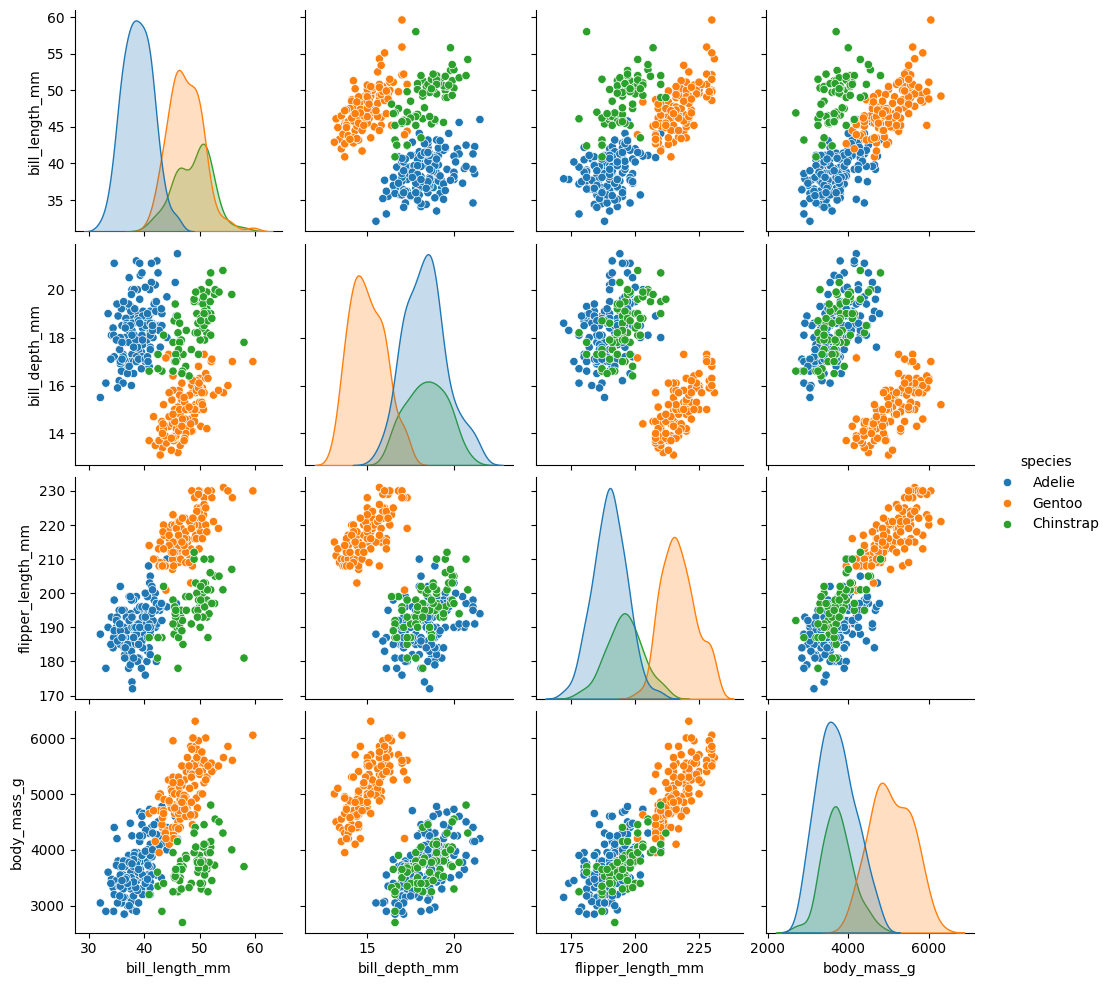

In [ ]:
#Pairplot
datos_numericos["species"]=datos["species"]
sns.pairplot(datos_numericos, hue="species")

<ipython-input-8-22bd1d477a3a>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  datos_numericos["species"] = datos["species"]
<ipython-input-8-22bd1d477a3a>:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=datos_numericos, x="species", y=col, palette="cool")
<ipython-input-8-22bd1d477a3a>:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=datos_numericos, x="species", y=col, palette="cool")
<ipython-input-8-22bd1d477a3a>:9: FutureWarning: 

P

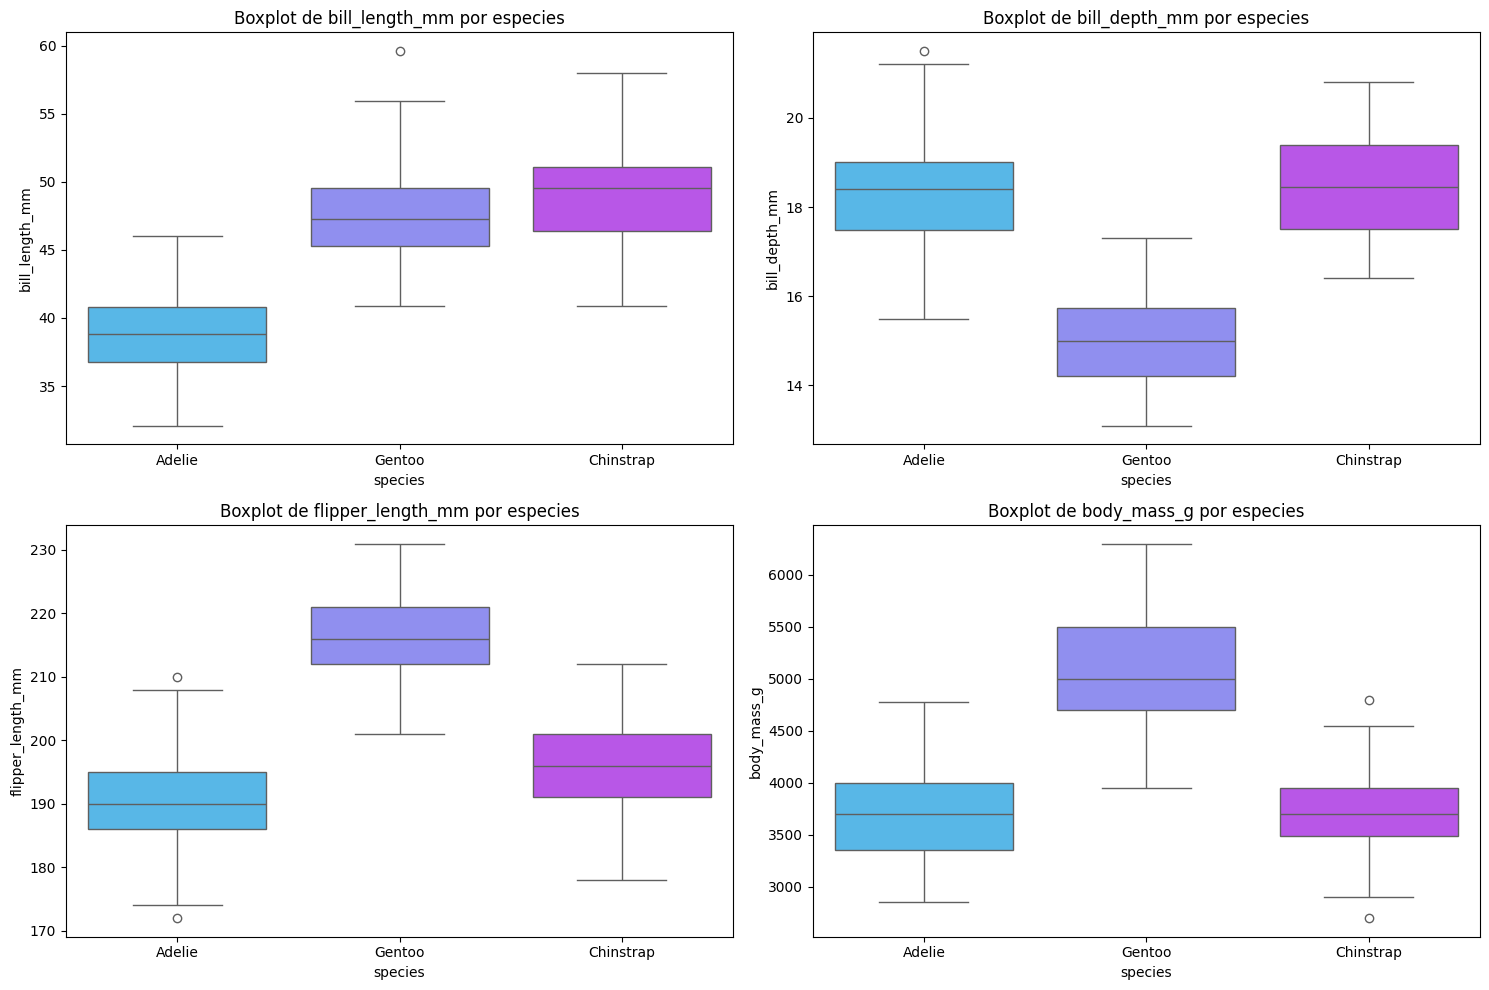

In [ ]:
#Distribucion de las variables numéricas con respecto a la variable de interes (species)
datos_numericos["species"] = datos["species"]
# Crear una figura para los boxplots
plt.figure(figsize=(15, 10))

# Dibujar un boxplot para cada variable numérica
for i, col in enumerate(num_col):
    plt.subplot(2, 2, i + 1)
    sns.boxplot(data=datos_numericos, x="species", y=col, palette="cool")
    plt.title(f'Boxplot de {col} por especies')

# Ajustar el layout
plt.tight_layout()

# Mostrar el gráfico
plt.show()

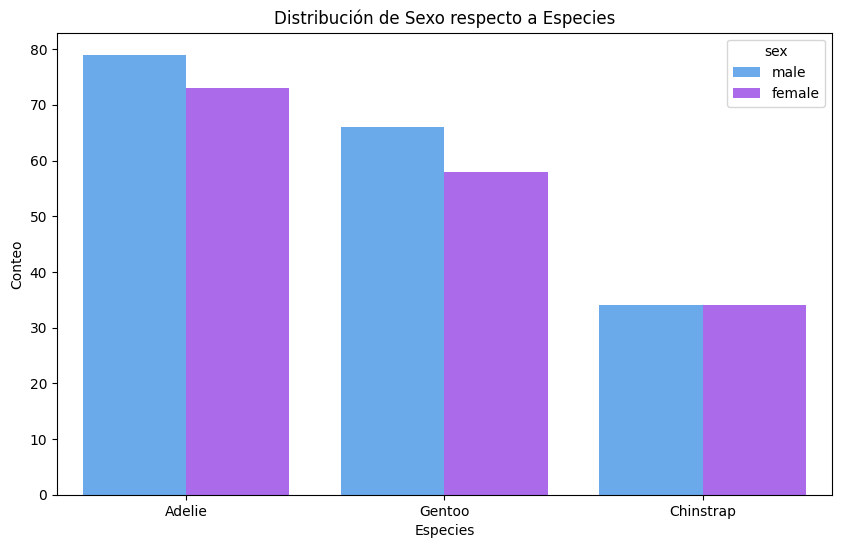

In [ ]:

plt.figure(figsize=(10, 6))
sns.countplot(data=datos, x='species', hue='sex', palette='cool')
# Añadir títulos y etiquetas
plt.title('Distribución de Sexo respecto a Especies')
plt.xlabel('Especies')
plt.ylabel('Conteo')

# Mostrar el gráfico
plt.show()

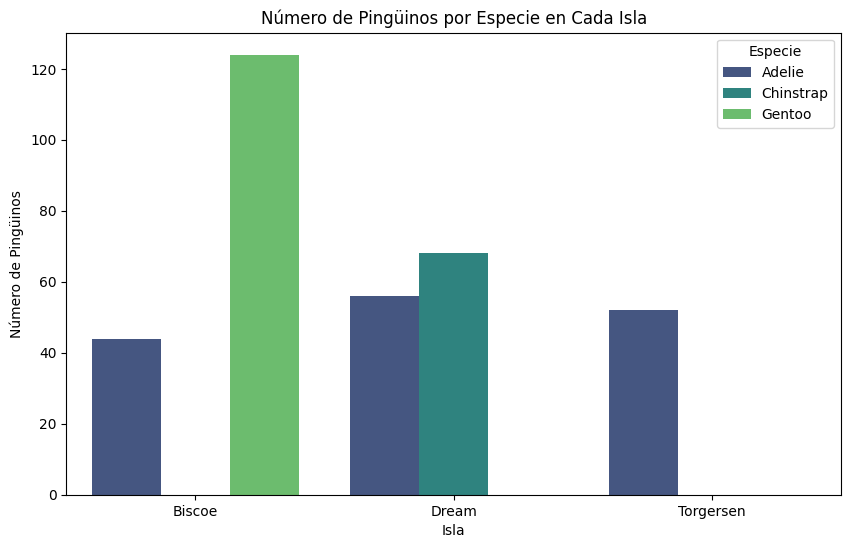

In [ ]:
# Contar la frecuencia de cada combinación de especie e isla
counts = datos.groupby(['species', 'island']).size().reset_index(name='count')
# Crear un gráfico de barras apiladas
plt.figure(figsize=(10, 6))
sns.barplot(data=counts, x='island', y='count', hue='species', palette='viridis')
plt.title('Número de Pingüinos por Especie en Cada Isla')
plt.xlabel('Isla')
plt.ylabel('Número de Pingüinos')
plt.legend(title='Especie')
# Mostrar el gráfico
plt.show()

#Seleccionando variables independientes y dependiente

In [ ]:
X=datos.iloc[:,1:].values
y=datos.iloc[:,0].values

In [ ]:
X

array([['Torgersen', 39.1, 18.7, 181.0, 3750.0, 'male'],
       ['Torgersen', 39.5, 17.4, 186.0, 3800.0, 'female'],
       ['Torgersen', 40.3, 18.0, 195.0, 3250.0, 'female'],
       ...,
       ['Dream', 49.6, 18.2, 193.0, 3775.0, 'male'],
       ['Dream', 50.8, 19.0, 210.0, 4100.0, 'male'],
       ['Dream', 50.2, 18.7, 198.0, 3775.0, 'female']], dtype=object)

#Variables Dummy o OneHotEncoder

In [ ]:

#df_imputed = pd.get_dummies(datos, columns=['sex','island'], drop_first=True)
#df_imputed
ct=ColumnTransformer(transformers=[('encorder',OneHotEncoder(),[0,5])], remainder= 'passthrough') #transforma los datos de la columna de la posición 1,4,5 la cual es de tipo categorico
# mantiene el resto de las columnas sin cambios (usando remainder='passthrough').
X = ct.fit_transform(X)
X

array([[0.0, 0.0, 1.0, ..., 18.7, 181.0, 3750.0],
       [0.0, 0.0, 1.0, ..., 17.4, 186.0, 3800.0],
       [0.0, 0.0, 1.0, ..., 18.0, 195.0, 3250.0],
       ...,
       [0.0, 1.0, 0.0, ..., 18.2, 193.0, 3775.0],
       [0.0, 1.0, 0.0, ..., 19.0, 210.0, 4100.0],
       [0.0, 1.0, 0.0, ..., 18.7, 198.0, 3775.0]], dtype=object)

In [ ]:
X.shape

(344, 9)

## Data splitting

In [ ]:
train_test_split
X_train, X_test, y_train, y_test = train_test_split( X, y, test_size=0.2, random_state=42)

## Escalamiento de características

In [ ]:
sc=StandardScaler()
X_train_Sc=sc.fit_transform(X_train) #estandarizar datos de entrenamiento
X_test_Sc=sc.transform(X_test)

## Preselecciono un modelo usando k-fold

In [ ]:
clasif = {
    'SVM': SVC(),
    'KNN': KNeighborsClassifier(),
    'Tree': DecisionTreeClassifier(),
    'LR': LogisticRegression(),
    'Forest': RandomForestClassifier(),
}
score_matrix = [['SVM',0,0],
                ['KNN',0,0],
                ['Tree',0,0],
                ['LR',0,0],
                ['Forest',0,0]]


In [ ]:
#https://scikit-learn.org/stable/modules/cross_validation.html
i=0
for clf in clasif:
  clasificador = clasif[clf]
  scores = cross_val_score(estimator = clasificador, X = X_train_Sc, y = y_train, cv = 10)
  score_matrix[i][1] = scores.mean()
  score_matrix[i][2] = scores.std()
  i+=1
score_matrix = pd.DataFrame(score_matrix, columns=['Modelo', 'Mean Accuracy', 'Std Accuracy'])
print(score_matrix)

   Modelo  Mean Accuracy  Std Accuracy
0     SVM       0.989153      0.016572
1     KNN       0.985714      0.017496
2    Tree       0.948942      0.043402
3      LR       0.989153      0.016572
4  Forest       0.981746      0.018260


## Ajusto Hiperparámetros usando GridSearch

In [ ]:
#https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LogisticRegression.html
parametros = [{'solver' : ['liblinear'], 'penalty':['l1','l2'], 'C': [0.25,0.5,0.75,1]},
              {'solver': ['lbfgs'], 'penalty':['l2'], 'C': [0.25,0.5,0.75,1]}]
grid_search = GridSearchCV(estimator = LogisticRegression(), param_grid= parametros, scoring = 'accuracy', cv = 10, n_jobs= -1) #n_jobs: usar todos los procesadores que tenga a disposicion para evitar problemas computacionales
grid_search.fit(X_train_Sc, y_train)
best_accuracy = grid_search.best_score_
best_params = grid_search.best_params_
print('Mejor accuracy :', best_accuracy)
print('Mejores parametros :', best_params)

Mejor accuracy : 0.9927248677248677
Mejores parametros : {'C': 0.5, 'penalty': 'l1', 'solver': 'liblinear'}


## Escojo el modelo con los hiperparámetros mejor ajustados

In [ ]:
mejor_clasificador = grid_search.best_estimator_
mejor_clasificador.fit(X_train_Sc,y_train)

LogisticRegression(C=0.5, penalty='l1', solver='liblinear')

In [ ]:
# Evaluar el mejor modelo en el conjunto de prueba
test_score = mejor_clasificador.score(X_test_Sc, y_test)
print(f"Prueba de precisión del mejor modelo: {test_score:.4f}")

Prueba de precisión del mejor modelo: 1.0000


##PCA para visualización

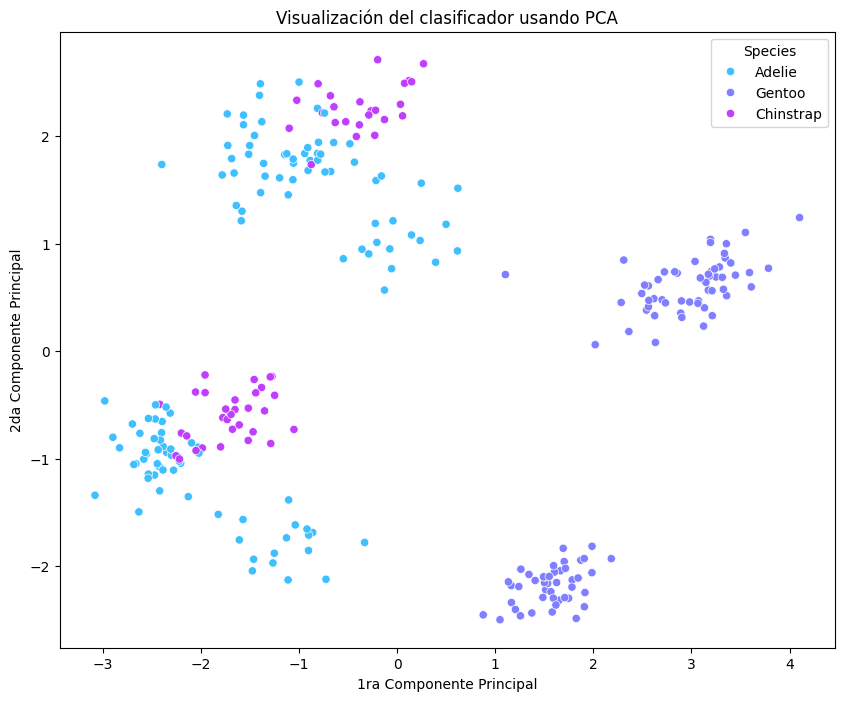

In [ ]:
# Aplicar PCA para visualización
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_train_Sc)

# Crear un DataFrame para la visualización
pca_df = pd.DataFrame(data=X_pca, columns=['PC1', 'PC2'])
# Convertir y_train a una Serie de Pandas y añadirlo al DataFrame PCA
pca_df['species'] = pd.Series(y_train).reset_index(drop=True)

# Visualizar con seaborn
plt.figure(figsize=(10, 8))
sns.scatterplot(data=pca_df, x='PC1', y='PC2', hue='species', palette='cool')
plt.title('Visualización del clasificador usando PCA')
plt.xlabel('1ra Componente Principal')
plt.ylabel('2da Componente Principal')
plt.legend(title='Species')
plt.show()


#Dado el objetivo de clasificar la especie del pingüino utilizando múltiples modelos, seleccionar el mejor, ajustar sus hiperparámetros y visualizar los resultados
#utilizando PCA con 2 componentes principales, se aplica PCA solo para la visualización después de haber entrenado y ajustado el mejor modelo con todas
#las características disponibles. Esto asegura que el modelo se entrena con toda la información, lo cual es crucial para obtener el mejor rendimiento posible.

## Ejercicio 2

Use el conjunto de datos de los pinguinos de las islas de antártica. Usando los valores numéricos del conjunto de datos realice un clústering usando k-means. Para establecer el número óptimo de clusters utilice el método del codo y el método de las siluetas. Muestre el resultado de la partición óptima usando PCA en 3 dimensiones.

In [ ]:
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
import matplotlib.pyplot as plt

# Seleccionar solo las columnas numéricas

In [ ]:
num_col = ['bill_length_mm', 'bill_depth_mm', 'flipper_length_mm', 'body_mass_g']
datos_numericos = datos[num_col] # Crear un nuevo DataFrame solo con las columnas numéricas

# Estandarizar los datos

In [ ]:
sc = StandardScaler()
datos_numericos_Sc = sc.fit_transform(datos_numericos)

# Determinar el número óptimo de clústeres usando el método del codo

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` ex

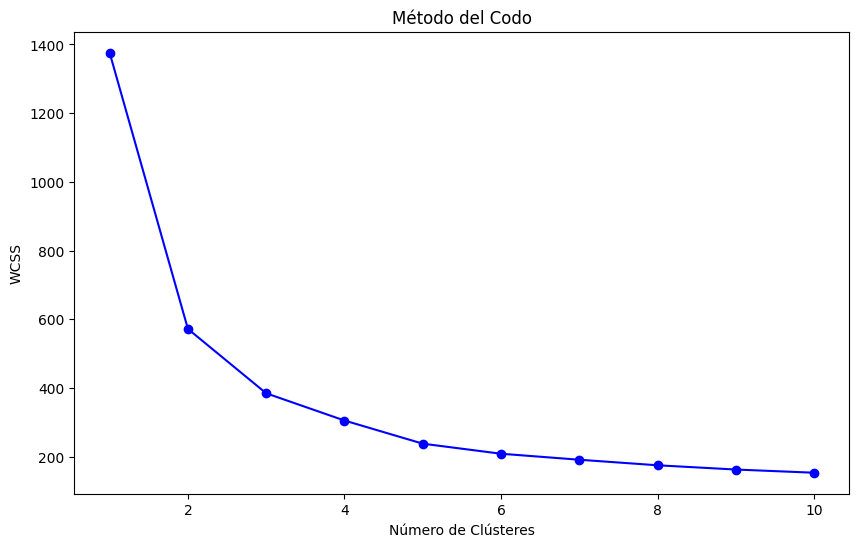

In [ ]:
wcss = []
for i in range(1, 11): # Iterar sobre un rango de 1 a 10 (número de clústeres)
    kmeans = KMeans(n_clusters=i, random_state=42) # Crear un modelo KMeans con i clústeres
    kmeans.fit(datos_numericos_Sc) # Ajustar el modelo a los datos estandarizados
    wcss.append(kmeans.inertia_)
# Graficar el método del codo
plt.figure(figsize=(10, 6))
plt.plot(range(1, 11), wcss, marker='o',color='b')
plt.title('Método del Codo')
plt.xlabel('Número de Clústeres')
plt.ylabel('WCSS')
plt.show()

# Aplicar K-means con el número óptimo de clústeres (método del codo)

In [ ]:
clusters_optimos = 3
kmeans = KMeans(n_clusters=clusters_optimos, init = 'k-means++', random_state=42, n_init='auto') # Crear un modelo KMeans con el número óptimo de clústeres
etiqueta_kmeans = kmeans.fit_predict(datos_numericos_Sc) # Ajustar el modelo a los datos y obtener las etiquetas de los clústeres
print(etiqueta_kmeans)

[0 0 0 2 0 0 0 0 0 2 0 0 0 0 0 0 0 2 0 2 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 2 0 0 0 0 0 2 0 0 0 2 0 0 0 0 0 0 0 2 0 0 0 0 0 0 0 2 0 0 0 2
 0 2 0 0 0 2 0 2 0 0 0 0 0 0 0 0 0 2 0 0 0 2 0 0 0 2 0 2 0 0 0 0 0 0 0 2 0
 2 0 2 0 2 0 0 0 0 0 0 0 2 0 0 0 0 0 2 0 2 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 2 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 2 1 1 1 1 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 0 2 0 2 2 2 2 2 2 2 0 2 0 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 0 2 2
 2 2 2 2 2 2 2 2 2 2 2]


# Aplicar PCA para reducción a 3 dimensiones

In [ ]:
# Aplicar PCA para reducción a 3 dimensiones
pca = PCA(n_components=3) # Crear un objeto PCA para reducir los datos a 3 componentes principales
datos_pca = pca.fit_transform(datos_numericos_Sc) # Ajustar y transformar los datos estandarizados a 3 componentes principales

# Crear un DataFrame para la visualización
pca_df = pd.DataFrame(data=datos_pca, columns=['PC1', 'PC2', 'PC3']) # Crear un DataFrame con los datos transformados por PCA
pca_df['Cluster'] = etiqueta_kmeans # Añadir la columna de etiquetas de clústeres al DataFrame

# Visualizar los resultados en 3D

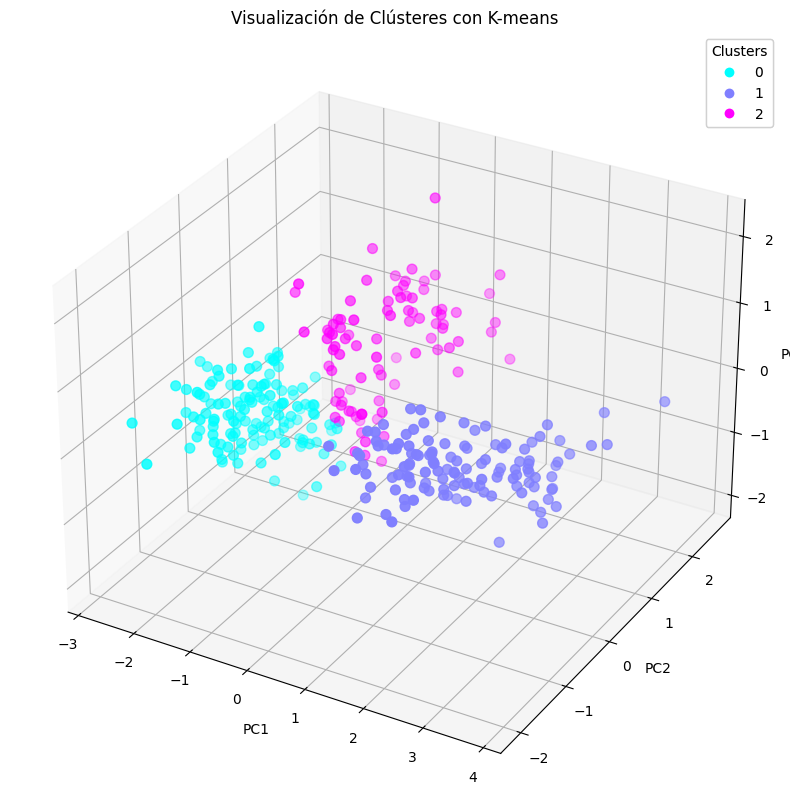

In [ ]:
fig = plt.figure(figsize=(12, 10))
ax = fig.add_subplot(111, projection='3d')
scatter = ax.scatter(pca_df['PC1'], pca_df['PC2'], pca_df['PC3'], c=pca_df['Cluster'], cmap='cool', s=50) # Crear un gráfico de dispersión 3D de los datos transformados por PCA, coloreados por clúster
legend1 = ax.legend(*scatter.legend_elements(), title="Clusters") # Añadir una leyenda con los clústeres
ax.add_artist(legend1) # Añadir la leyenda a la figura
ax.set_xlabel('PC1')
ax.set_ylabel('PC2')
ax.set_zlabel('PC3')
ax.set_title('Visualización de Clústeres con K-means')
plt.show()

# Determinar el número óptimo de clústeres usando el método de las siluetas

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` ex

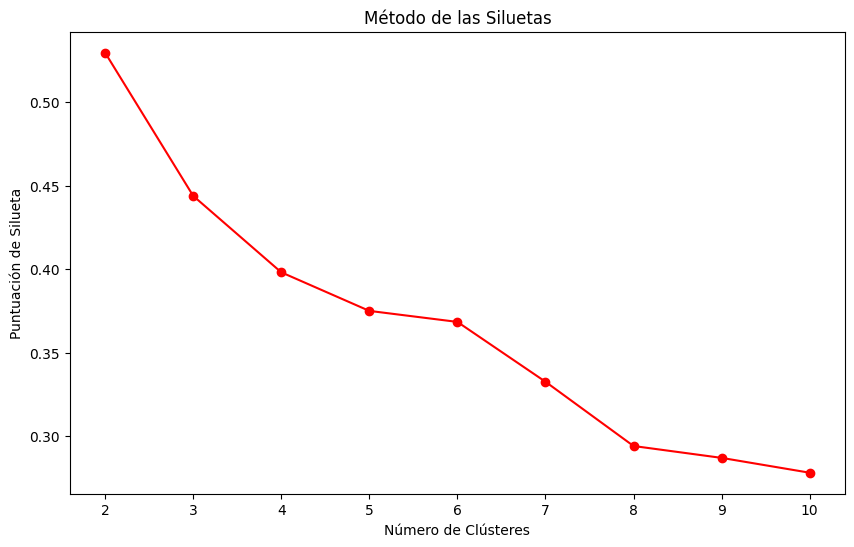

In [ ]:
silhouette_scores = []
for i in range(2, 11):  # El número mínimo de clústeres es 2
    kmeans = KMeans(n_clusters=i, random_state=42)
    etiqueta_kmeans = kmeans.fit_predict(datos_numericos_Sc)
    silhouette_avg = silhouette_score(datos_numericos_Sc, etiqueta_kmeans) # Calcular la puntuación de silueta
    silhouette_scores.append(silhouette_avg)
# Graficar el método de las siluetas
plt.figure(figsize=(10, 6))
plt.plot(range(2, 11), silhouette_scores, marker='o', color='r')
plt.title('Método de las Siluetas')
plt.xlabel('Número de Clústeres')
plt.ylabel('Puntuación de Silueta')
plt.show()

# Aplicar K-means con el número óptimo de clústeres (método Siluetas)

In [ ]:
clusters_optimos_s = 2  # el número óptimo de clústeres es aquel que maximiza la puntuación de silueta. En este caso, el punto más alto en la gráfica es para 2
kmeanss = KMeans(n_clusters=clusters_optimos_s, init = 'k-means++', random_state=42, n_init='auto')
etiqueta_kmeanss = kmeanss.fit_predict(datos_numericos_Sc)
print(etiqueta_kmeanss)

[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 0 1 1 1 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0]


# Aplicar PCA para reducción a 3 dimensiones

In [ ]:
# Aplicar PCA para reducción a 3 dimensiones
pca = PCA(n_components=3)
datos_pca = pca.fit_transform(datos_numericos_Sc)

# Crear un DataFrame para la visualización
pca_df = pd.DataFrame(data=datos_pca, columns=['PC1', 'PC2', 'PC3'])
pca_df['Cluster'] = etiqueta_kmeanss

# Visualizar los resultados en 3D

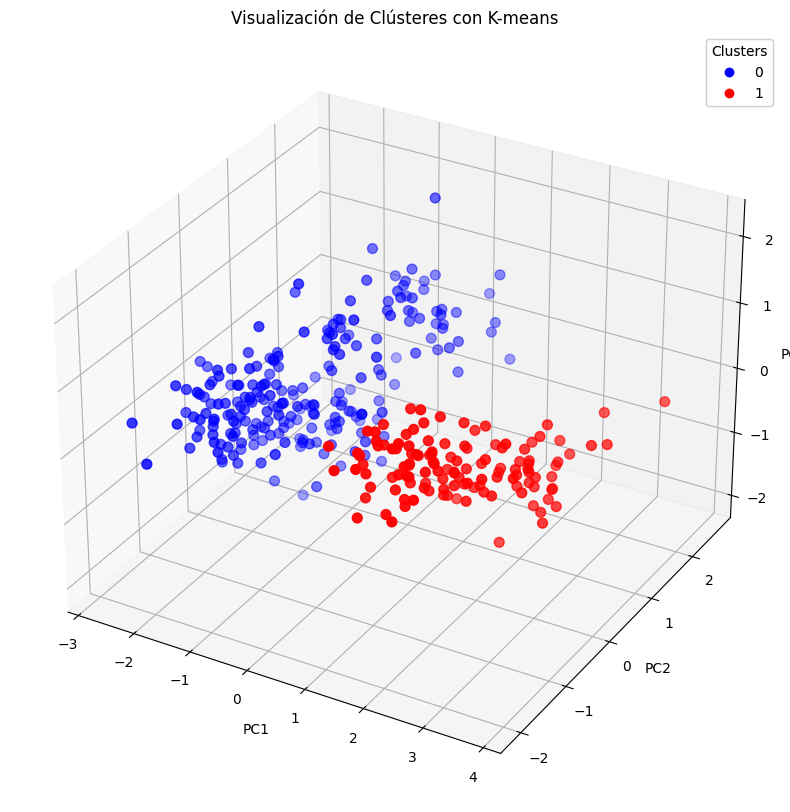

In [ ]:
fig = plt.figure(figsize=(12, 10))
ax = fig.add_subplot(111, projection='3d')
scatter = ax.scatter(pca_df['PC1'], pca_df['PC2'], pca_df['PC3'], c=pca_df['Cluster'], cmap='bwr', s=50)
legend1 = ax.legend(*scatter.legend_elements(), title="Clusters")
ax.add_artist(legend1)
ax.set_xlabel('PC1')
ax.set_ylabel('PC2')
ax.set_zlabel('PC3')
ax.set_title('Visualización de Clústeres con K-means')
plt.show()